**Goal**: Prioritize the bug reports and test them here. 

# Bug Reports

In [1]:
import project_path
from rdlib import *  # this imports the base libraries

In [9]:
# METADATA
PATH_METADATA_DATASET = '../data/datasets/exp_v08/df_summary.csv'
# PRIORITIZATION INFOS
PATH_REPO_LAST_COMMIT = '../data/github_repo_infos/exp_v08/latest_commit_date.db'
# WARNINGS
PATH_WARNINGS_SARIF = '../data/analysis_results/exp_v08/codeql_2023-03-13_13-54-00/data.sarif'

In [17]:
# repos data
import sqlite3
conn = sqlite3.connect(PATH_REPO_LAST_COMMIT)
df_repo_info = pd.read_sql_query("SELECT * FROM commits", conn)
# rename columns: repo -> repository_name
df_repo_info = df_repo_info.rename(columns={'repo': 'repository_name'})
conn.close()
print(df_repo_info.shape)
df_repo_info.head()

(72760, 3)


,repository_name,date_str,timestamp
0,sethuquantum/LearnQuantum,2022-11-24 23:49:15,1.669330e+09
1,QRussia/basics-of-quantum-computing-translate,2021-07-23 01:33:13,1.626997e+09
2,roytu/QOSF-FeMoco2020,2021-01-24 14:59:31,1.611497e+09
3,Abdoelabassi/Qbronze,2022-04-30 12:17:04,1.651314e+09
4,904194705/Qiskit-RIKEN-project-,2019-07-08 01:48:59,1.562543e+09


In [18]:
# warnings data
PATH_WARNINGS_CSV_NEW = PATH_WARNINGS_SARIF.replace(".sarif", ".csv")
! sarif csv --output {PATH_WARNINGS_CSV_NEW} {PATH_WARNINGS_SARIF}
df_warnings = pd.read_csv(PATH_WARNINGS_CSV_NEW)
df_warnings['rule'] = df_warnings['Code'].apply(lambda e: e.split(" ")[0])
df_warnings['unique_id'] = df_warnings['Location'].apply(lambda e: e.split(".")[0])
df_warnings.head()

Writing CSV summary for data.sarif to data.csv


,Tool,Severity,Code,Location,Line,rule,unique_id
0,CodeQL,warning,ql-double-measurement Two consecutive measurem...,five_qubit_stabilizer_728e76.py,1012,ql-double-measurement,five_qubit_stabilizer_728e76
1,CodeQL,warning,ql-double-measurement Two consecutive measurem...,five_qubit_stabilizer_728e76.py,1013,ql-double-measurement,five_qubit_stabilizer_728e76
2,CodeQL,warning,ql-double-measurement Two consecutive measurem...,five_qubit_stabilizer_728e76.py,1014,ql-double-measurement,five_qubit_stabilizer_728e76
3,CodeQL,warning,ql-double-measurement Two consecutive measurem...,five_qubit_stabilizer_728e76.py,1015,ql-double-measurement,five_qubit_stabilizer_728e76
4,CodeQL,warning,ql-double-measurement Two consecutive measurem...,seven_qubit_stabilizer_4347a9.py,102,ql-double-measurement,seven_qubit_stabilizer_4347a9


In [19]:
# METDATA
df_metadata = pd.read_csv(PATH_METADATA_DATASET)
print(df_metadata.columns)
df_metadata['unique_id'] = df_metadata.apply(
    lambda row: str(row['filestem']) + "_" + str(row['hash']),
    axis=1
)
df_metadata = df_metadata[['unique_id', 'extension', 'repository_name']]
df_metadata.head()

Index(['download_url', 'html_url', 'name', 'path', 'repository_description',
       'repository_fork', 'repository_name', 'repository_owner_url',
       'repository_url', 'score', 'filename', 'extension', 'filestem', 'hash',
       'unique_id'],
      dtype='object')


,unique_id,extension,repository_name
0,test_sabre_swap_95cbde,py,sethuquantum/LearnQuantum
1,B01_Qiskit_Reference-checkpoint_9b754a,ipynb,QRussia/basics-of-quantum-computing-translate
2,quantum_generator_d6f5f2,py,roytu/QOSF-FeMoco2020
3,B01_Qiskit_Reference_c78ae2,ipynb,Abdoelabassi/Qbronze
4,pulse_instruction_f43374,py,904194705/Qiskit-RIKEN-project-


In [20]:
df_warnings_plus_metadata = pd.merge(
    df_warnings,
    df_metadata,
    on='unique_id',
    how='left'
)
df_warnings_plus_metadata_plus_repo_info = pd.merge(
    df_warnings_plus_metadata,
    df_repo_info,
    on='repository_name',
    how='left'
)
df_warnings_plus_metadata_plus_repo_info.head()

,Tool,Severity,Code,Location,Line,rule,unique_id,extension,repository_name,date_str,timestamp
0,CodeQL,warning,ql-double-measurement Two consecutive measurem...,five_qubit_stabilizer_728e76.py,1012,ql-double-measurement,five_qubit_stabilizer_728e76,py,gwjacobson/QuantumErrorCorrection,2021-05-06 23:03:43,1.620335e+09
1,CodeQL,warning,ql-double-measurement Two consecutive measurem...,five_qubit_stabilizer_728e76.py,1012,ql-double-measurement,five_qubit_stabilizer_728e76,py,gwjacobson/QuantumErrorCorrection,2021-05-06 23:03:43,1.620335e+09
2,CodeQL,warning,ql-double-measurement Two consecutive measurem...,five_qubit_stabilizer_728e76.py,1012,ql-double-measurement,five_qubit_stabilizer_728e76,py,gwjacobson/QuantumErrorCorrection,2021-05-06 23:03:43,1.620335e+09
3,CodeQL,warning,ql-double-measurement Two consecutive measurem...,five_qubit_stabilizer_728e76.py,1012,ql-double-measurement,five_qubit_stabilizer_728e76,py,gwjacobson/QuantumErrorCorrection,2021-05-06 23:03:43,1.620335e+09
4,CodeQL,warning,ql-double-measurement Two consecutive measurem...,five_qubit_stabilizer_728e76.py,1013,ql-double-measurement,five_qubit_stabilizer_728e76,py,gwjacobson/QuantumErrorCorrection,2021-05-06 23:03:43,1.620335e+09


# Prioritization: Most Recent Commit First

['unitaryfund/mitiq' 'C2QA/bosonic-qiskit' 'sudo-gera/c'
 'hlammiv/z2_matter_qc' 'cda-tum/ddsim' 'csenrui/Pauli_Learnability'
 'kevinwlu/iot' 'SupertechLabs/qiskit-superstaq' 'cda-tum/MQTBench'
 'cda-tum/MQTProblemSolver' 'cda-tum/qcec' 'ACDuriez/qu_engine_std'
 'Qiskit/platypus' 'tencent-quantum-lab/tensorcircuit' 'cda-tum/qmap'
 'AdamNaoui/LOG6953C_TPs' 'husisy/learning' 'microsoft/qdk-python'
 'ArfatSalman/qc-test']


,Tool,Severity,Code,Location,Line,rule,unique_id,extension,repository_name,date_str,timestamp
10133,CodeQL,warning,ql-oversized-circuit Circuit 'circuit' never m...,test_pec_665506.py,480,ql-oversized-circuit,test_pec_665506,py,unitaryfund/mitiq,2023-03-16 18:55:26,1.678989e+09
10145,CodeQL,warning,ql-oversized-circuit Circuit 'circuit' never m...,test_pec_665506.py,520,ql-oversized-circuit,test_pec_665506,py,unitaryfund/mitiq,2023-03-16 18:55:26,1.678989e+09
10119,CodeQL,warning,ql-oversized-circuit Circuit 'circuit' never m...,test_pec_665506.py,141,ql-oversized-circuit,test_pec_665506,py,unitaryfund/mitiq,2023-03-16 18:55:26,1.678989e+09
10120,CodeQL,warning,ql-oversized-circuit Circuit 'circuit' never m...,test_pec_665506.py,141,ql-oversized-circuit,test_pec_665506,py,unitaryfund/mitiq,2023-03-16 18:55:26,1.678989e+09
3140,CodeQL,warning,ql-oversized-circuit Circuit 'circ' never mani...,test_folding_607e79.py,1673,ql-oversized-circuit,test_folding_607e79,py,unitaryfund/mitiq,2023-03-16 18:55:26,1.678989e+09


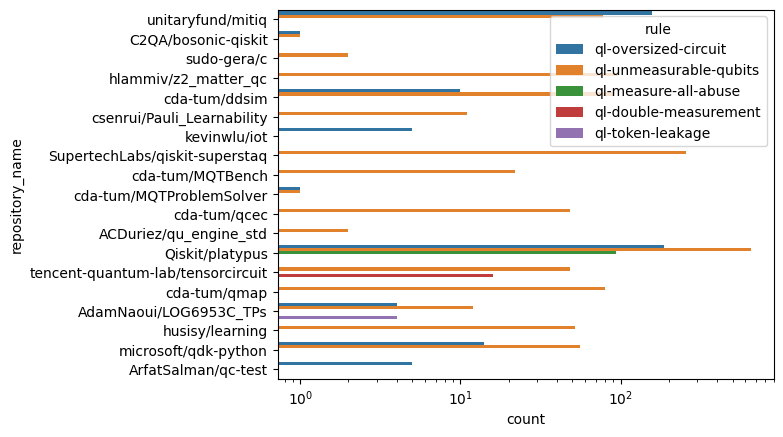

In [29]:
K_warnings = 2000
# sort by the most recent timestamp
df_warnings_plus_metadata_plus_repo_info = df_warnings_plus_metadata_plus_repo_info.sort_values(by=['timestamp'], ascending=False)
# pick repositories in the top 100 warnings
df_selection = df_warnings_plus_metadata_plus_repo_info.head(K_warnings)
sns.countplot(
    hue="rule",
    y="repository_name", data=df_selection)
plt.xscale('log')
repos_in_top_K = df_selection['repository_name'].unique()
print(repos_in_top_K)
df_warnings_plus_metadata_plus_repo_info.head(5)